<a href="https://colab.research.google.com/github/jaeduck223/bigdata/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_7%EC%A3%BC%EC%B0%A8_1%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

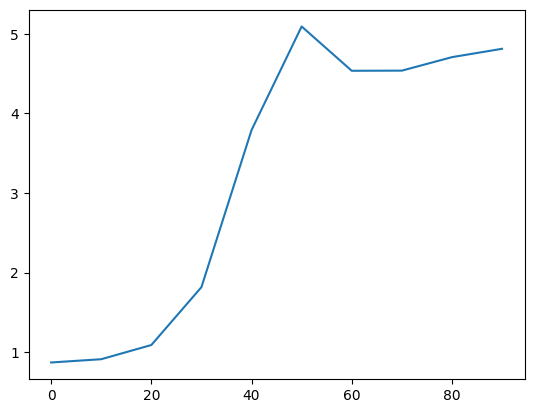

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s
s.plot()
#plt.xlim([-10, 100])

In [ ]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df

,A,B,C,D
0,1.258210,-0.912709,-0.220701,0.757932
10,0.964137,-2.117660,0.927501,2.433295
20,1.063795,-1.464482,-0.210076,2.094795
30,1.122304,-0.439856,-0.193603,1.423599
40,0.620301,-0.397960,0.389413,-0.051039
50,-0.115524,1.162587,0.552963,-0.619043
60,-1.184995,1.417176,0.751448,1.666726
70,-0.401966,3.095807,0.127559,2.375264
80,-1.398670,3.453188,-0.669660,3.676580
90,-0.861775,2.605291,-1.612774,5.491012


<Axes: >

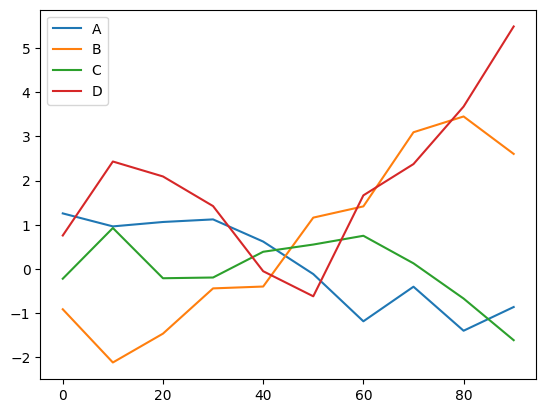

In [ ]:
df.plot()

<Axes: >

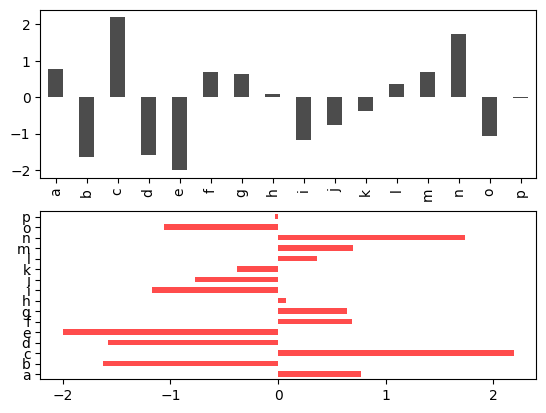

In [ ]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='r', alpha=0.7)

In [ ]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A','B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.887567,0.185109,0.132612,0.493602
two,0.920710,0.739683,0.729387,0.453041
three,0.676187,0.530650,0.870496,0.384301
four,0.113638,0.057126,0.798588,0.889785
five,0.902934,0.242709,0.400478,0.715724
six,0.033398,0.232209,0.751672,0.660224


<Axes: >

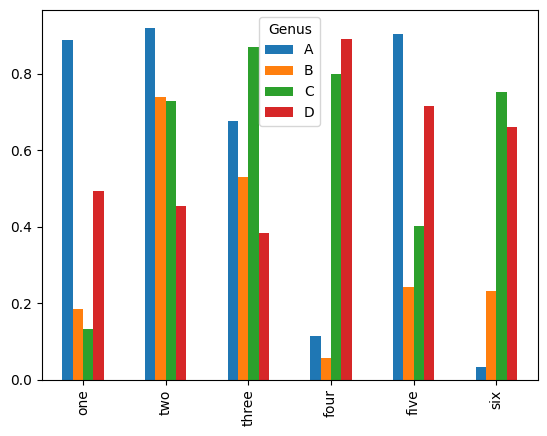

In [ ]:
#df.plot()
df.plot.bar()

<Axes: >

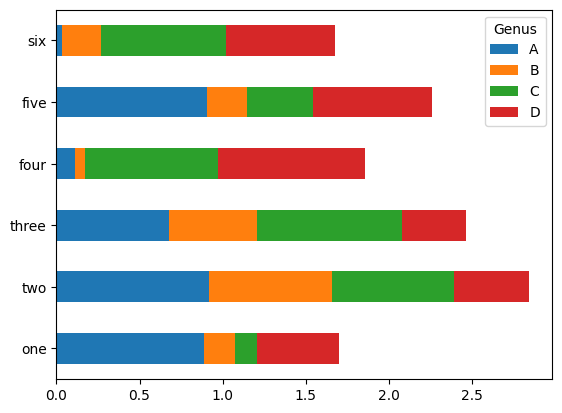

In [ ]:
df.plot.barh(stacked=True, alpha=1.0)
#df.plot.barh(alpha=1.0)
#누적 막대 그래프는 stacked=True 옵션을 사용해서 생성할 수있다.

In [ ]:
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
party_counts = pd.crosstab(tips['day'], tips['size']) #요일과 파티 숫자에 따라 교차 테이블을 생성
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
party_counts = party_counts.loc[:,2:5] #1인과 6인 파티는 제외
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [ ]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0) #각 로우의 합이 1이되도록 정규화하고 그래프를 그려본다.
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<Axes: xlabel='day'>

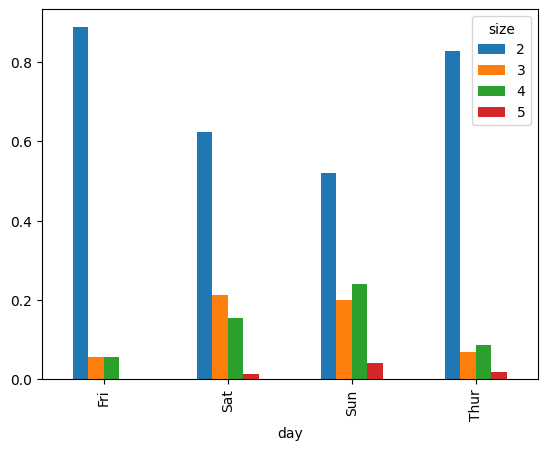

In [ ]:
party_pcts.plot.bar()
#주말에 파티의 규모가 커지는 것을 확인할 수있다.

In [ ]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [ ]:
tmp = tips[tips['day']=='Sun']
tmp['tip_pct'].mean()

np.float64(0.22571784420673371)

<Axes: xlabel='tip_pct', ylabel='day'>

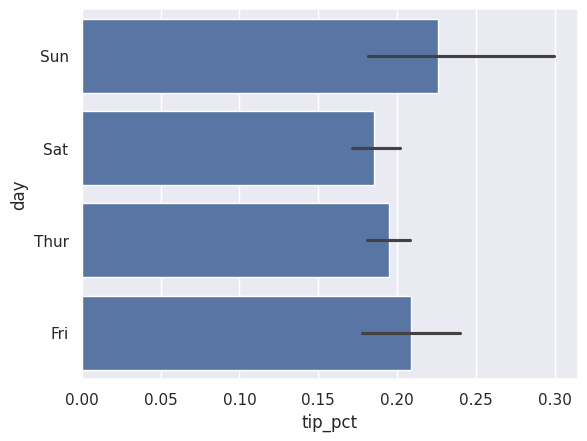

In [ ]:
import seaborn as sns
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
#seaborn의 data인자는 pandas의 DataFrame을 받는다.
#day 컬럼의 각 값에 대한 데이터는 여러개 존재하므로 tip_pct의 평균값으로 막대그래프를 그린다.
#막대 그래프 위에 덧그려진 검은 선은 95%의 신뢰구간을 나타낸다.

<Axes: >

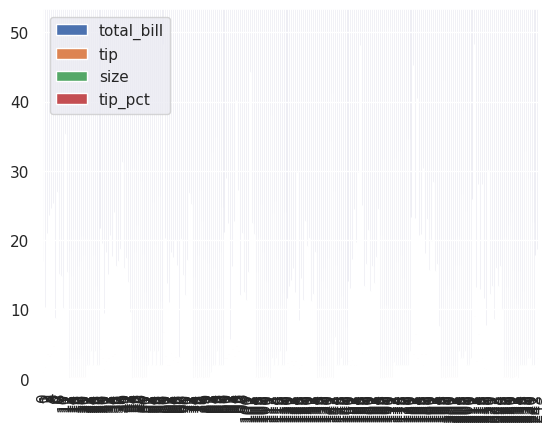

In [ ]:
tips.plot.bar()

<Axes: xlabel='tip_pct', ylabel='day'>

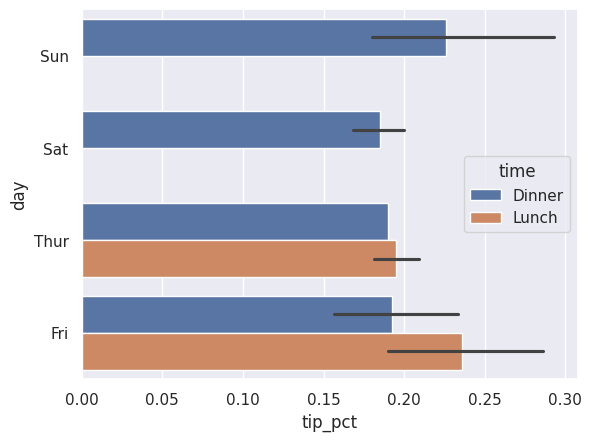

In [ ]:
plt.close()
sns.barplot(x='tip_pct', y='day', hue = 'time', data=tips, orient='h')
#seaborn.barplot 메소드의 hue 옵션을 사용하면 추가 분류에 따라 나누어 그릴수도 있다.

<Axes: xlabel='tip_pct', ylabel='day'>

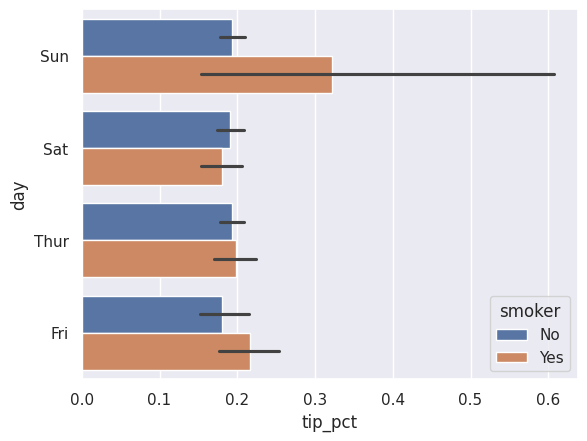

In [ ]:
sns.barplot(x='tip_pct', y='day', hue = 'smoker', data=tips, orient='h')

In [ ]:
#sns.set(style="whitegrid")
sns.set(style="darkgrid")

<Axes: ylabel='Frequency'>

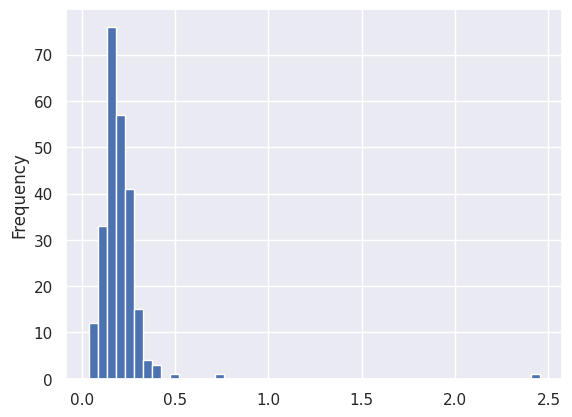

In [ ]:
plt.close()
tips['tip_pct'].plot.hist(bins=50)

<Axes: ylabel='Density'>

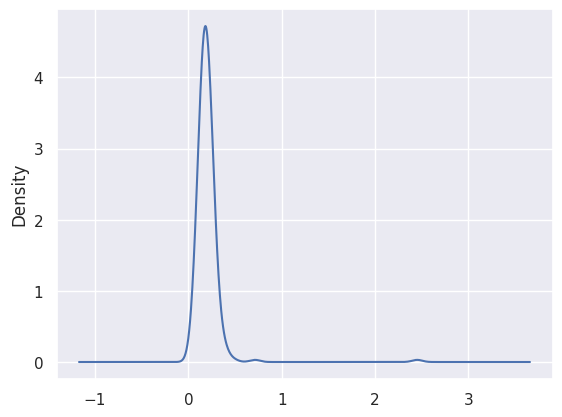

In [ ]:
plt.close()
tips['tip_pct'].plot.density()

<ipython-input-36-8d10473373f7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x, bins=50)


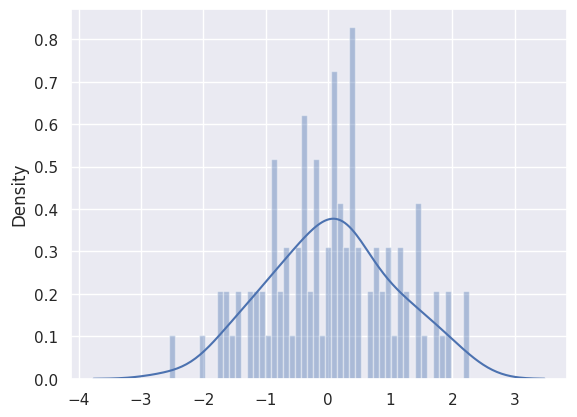

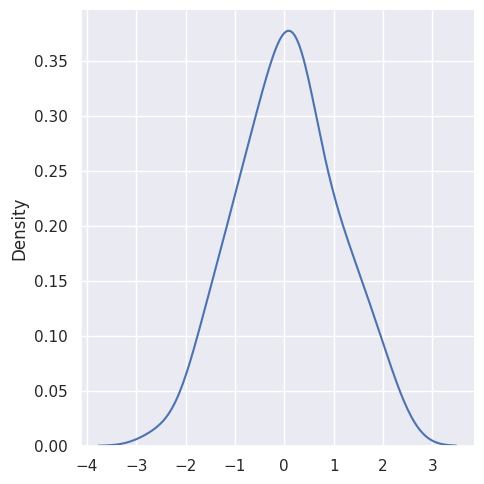

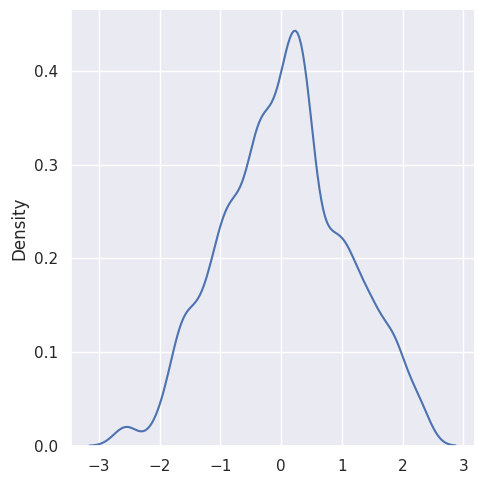

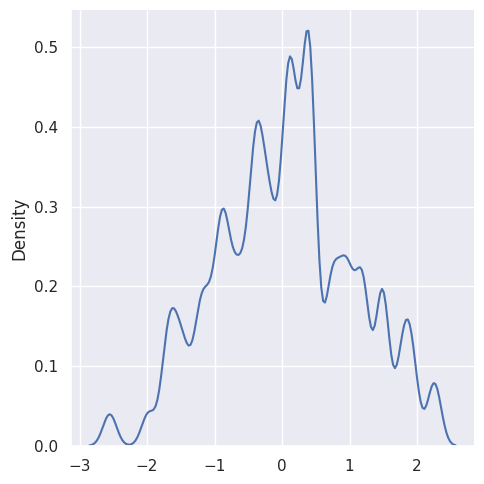

In [ ]:
import seaborn as sns, numpy as np
sns.set()
np.random.seed(0)
x = np.random.randn(100)
ax=sns.distplot(x, bins=50)
ax=sns.displot(x, kind='kde')
ax=sns.displot(x, kind='kde', bw_adjust = 0.5)
ax=sns.displot(x, kind='kde', bw_adjust = 0.25)

<ipython-input-37-5bee7feaa31d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color='k')


TypeError: distplot() got an unexpected keyword argument 'kind'

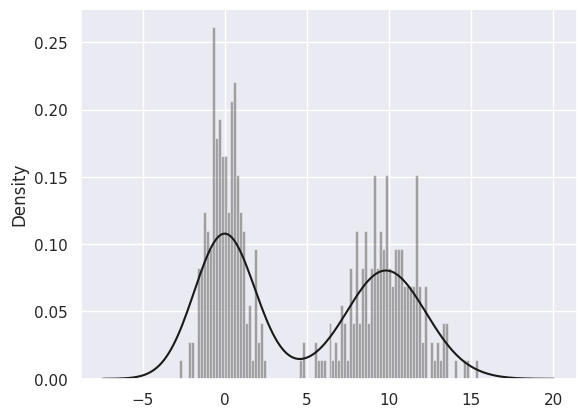

In [ ]:
plt.close()
import pandas as pd
import seaborn as sns
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')
sns.distplot(values, kind='kde', color='k')
sns.distplot(values, kind='kde', color='k',fill=True)

In [ ]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

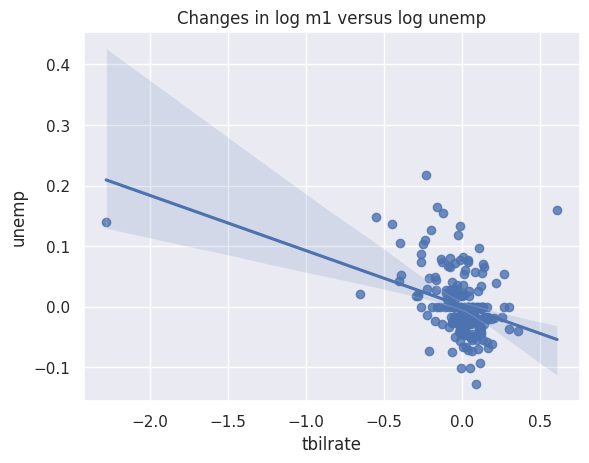

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='tbilrate', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
#regplot메소드를 사용해서 산포도와 선형회귀곡선을 함께 그릴수 있다.

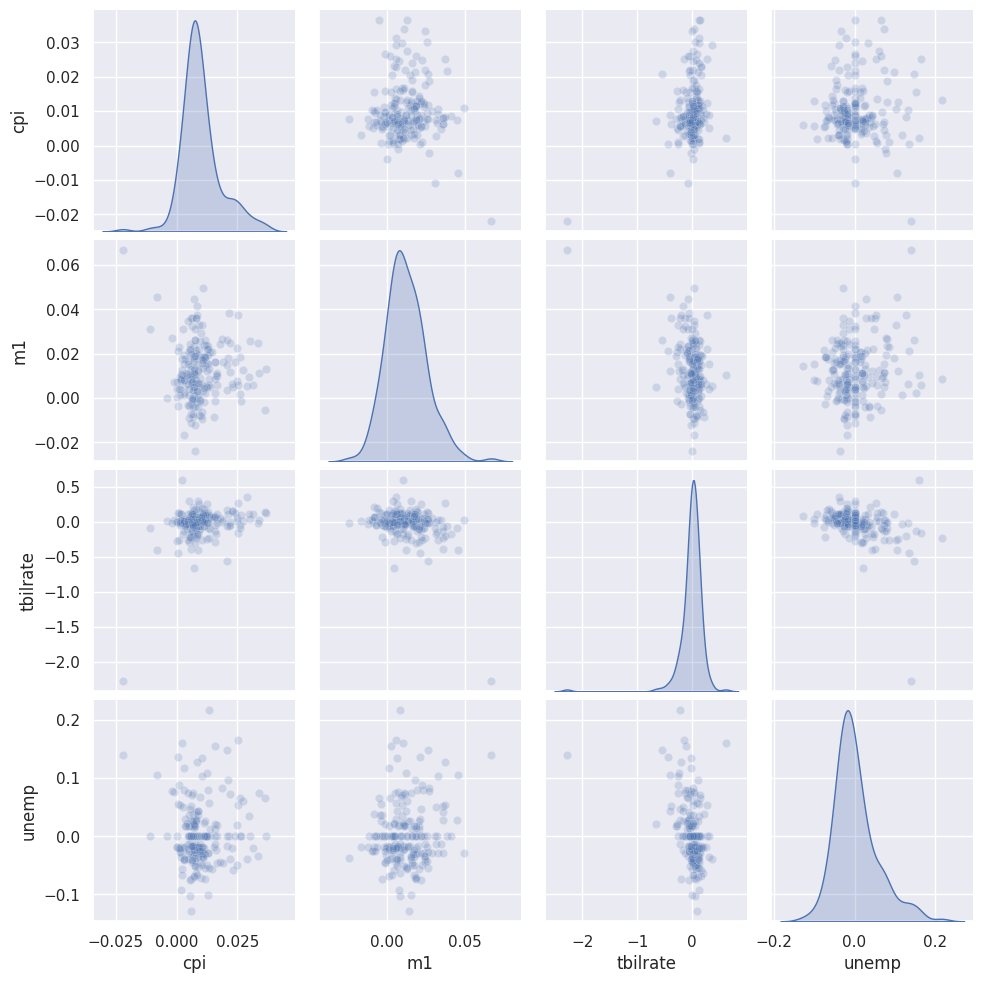

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})  #diag_kind='hist'

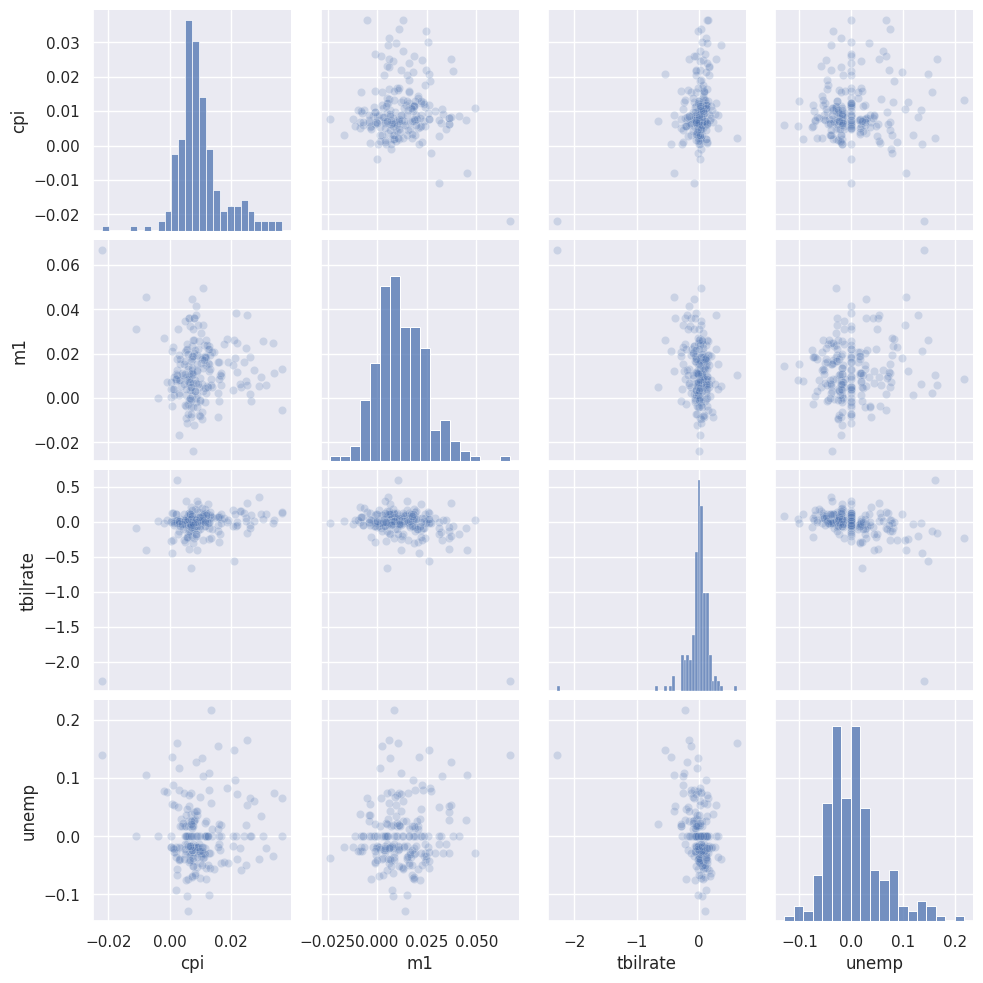

In [ ]:
sns.pairplot(trans_data, diag_kind='hist', plot_kws={'alpha': 0.2})

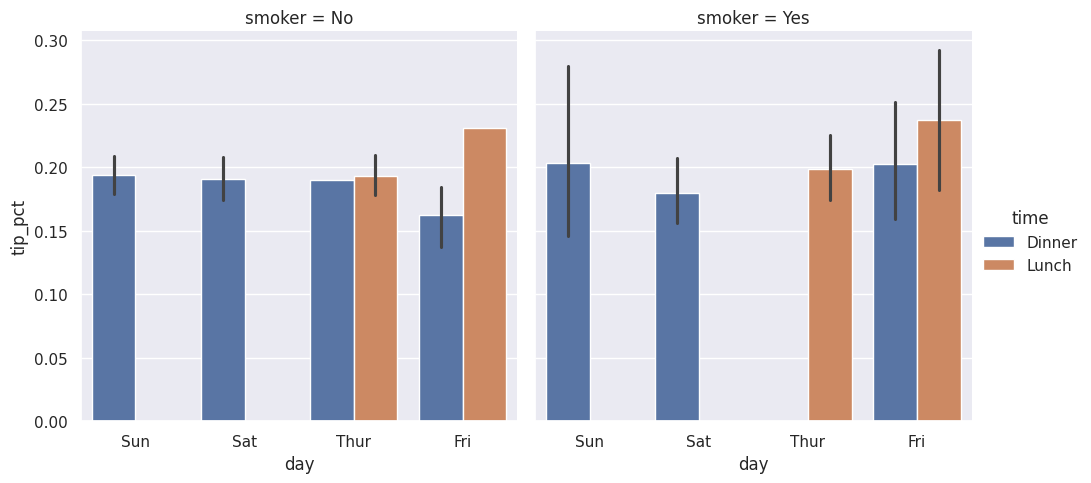

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind = 'bar', data=tips[tips.tip_pct < 1])

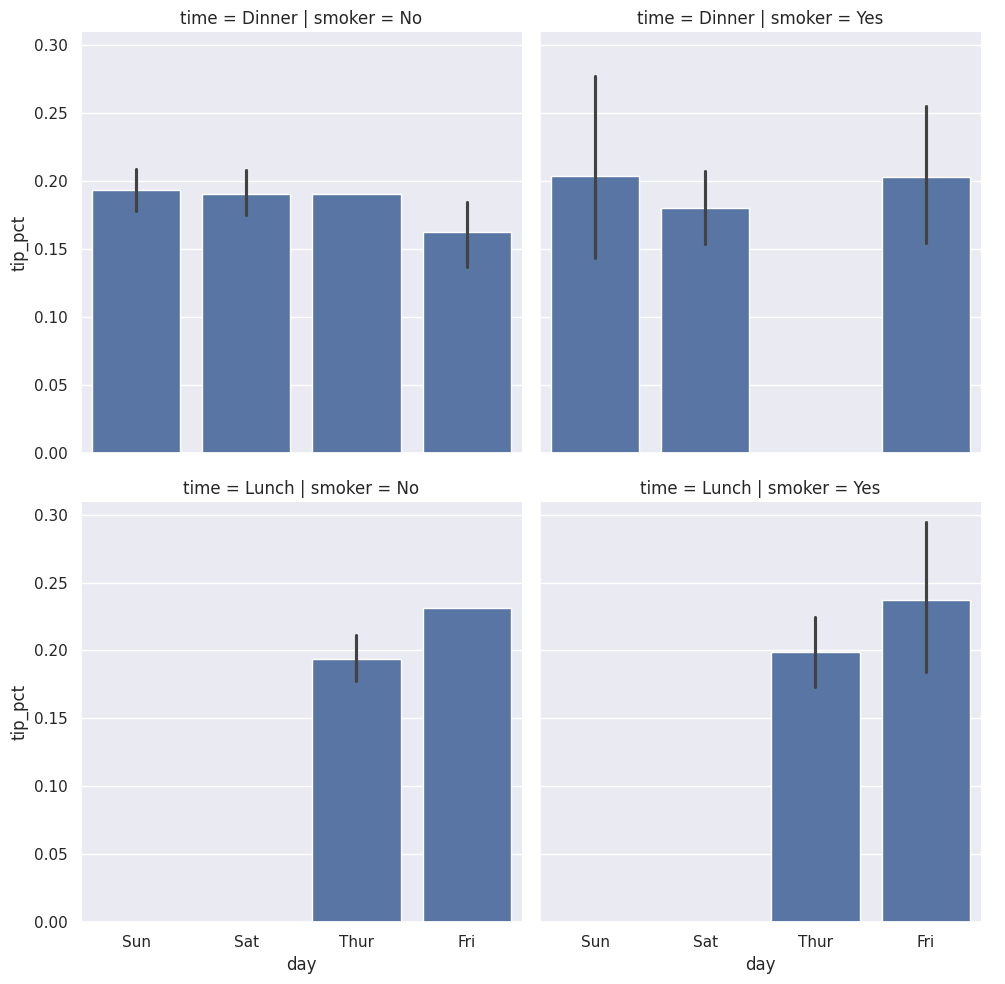

In [ ]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker',
              kind = 'bar', data=tips[tips.tip_pct < 1])

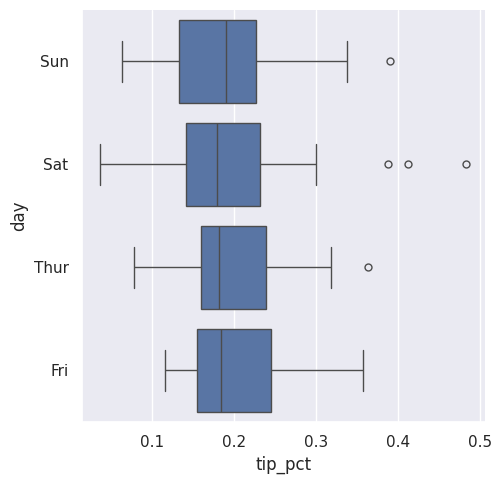

In [ ]:
sns.catplot(x='tip_pct', y='day', kind = 'box',
               data=tips[tips.tip_pct < 0.5])
#상자그림(box plot)은 중간값과 사분위 그리고 특이값을 보여준다.